[< 03 - Visualising and Analysing Networks](03%20-%20Visualising%20and%20Analysing%20Networks.ipynb) | [Home](https://github.com/harrisonpim/bookworm) | [05 - Cliques and Communities >](05%20-%20Cliques%20and%20Communities.ipynb)  

# Time and Chronology

In [13]:
from bookworm import *

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,12)

import pandas as pd
import numpy as np
import networkx as nx

/home/harrisonpim/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/harrisonpim/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/harrisonpim/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/harrisonpim/anaconda3/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnin

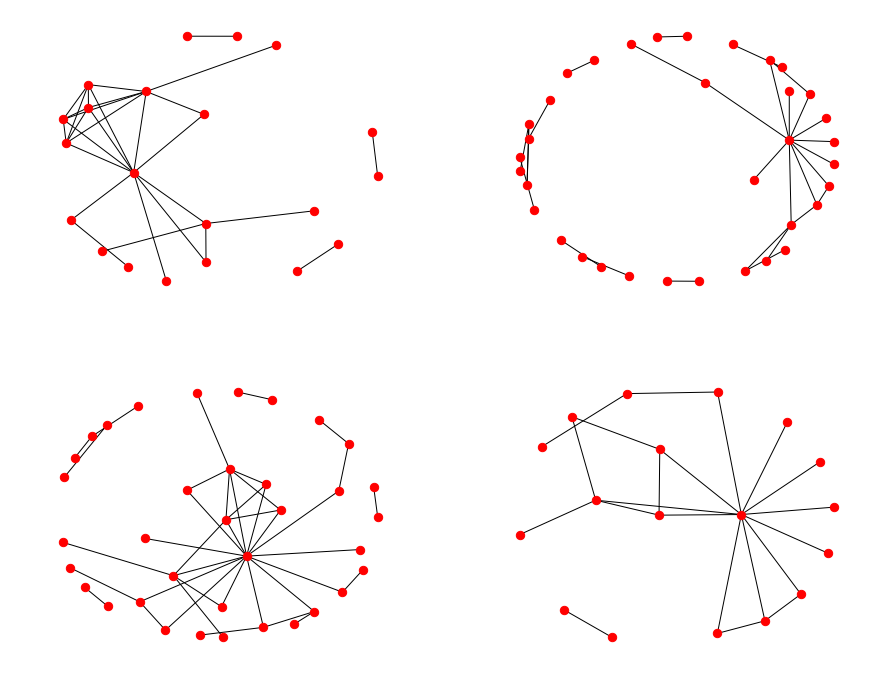

In [15]:
graph_dict = chronological_network('data/raw/hp_philosophers_stone.txt', 
                                   n_sections=4,
                                   cumulative=False)

fig = plt.figure()
for i in range(1, 5):
    fig.add_subplot(2, 2, i)
    nx.draw(graph_dict[i-1], node_size=70)

/home/harrisonpim/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/harrisonpim/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/harrisonpim/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/harrisonpim/anaconda3/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnin

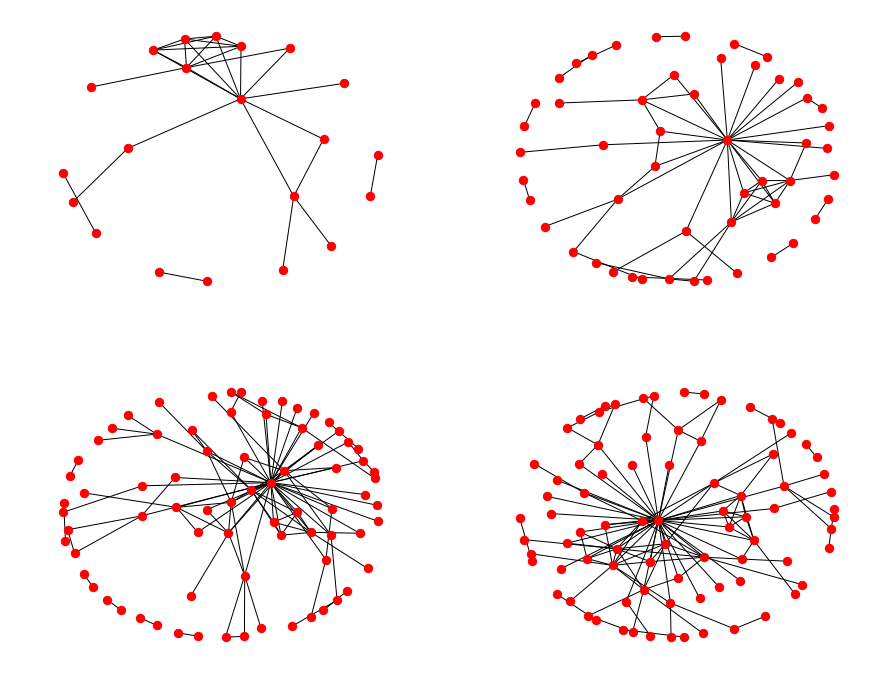

In [16]:
graph_dict = chronological_network('data/raw/hp_philosophers_stone.txt', 
                                   n_sections=4,
                                   cumulative=True)

fig = plt.figure()
for i in range(1, 5):
    fig.add_subplot(2, 2, i)
    nx.draw(graph_dict[i-1], node_size=70)

/home/harrisonpim/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/harrisonpim/anaconda3/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/harrisonpim/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/harrisonpim/anaconda3/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnin

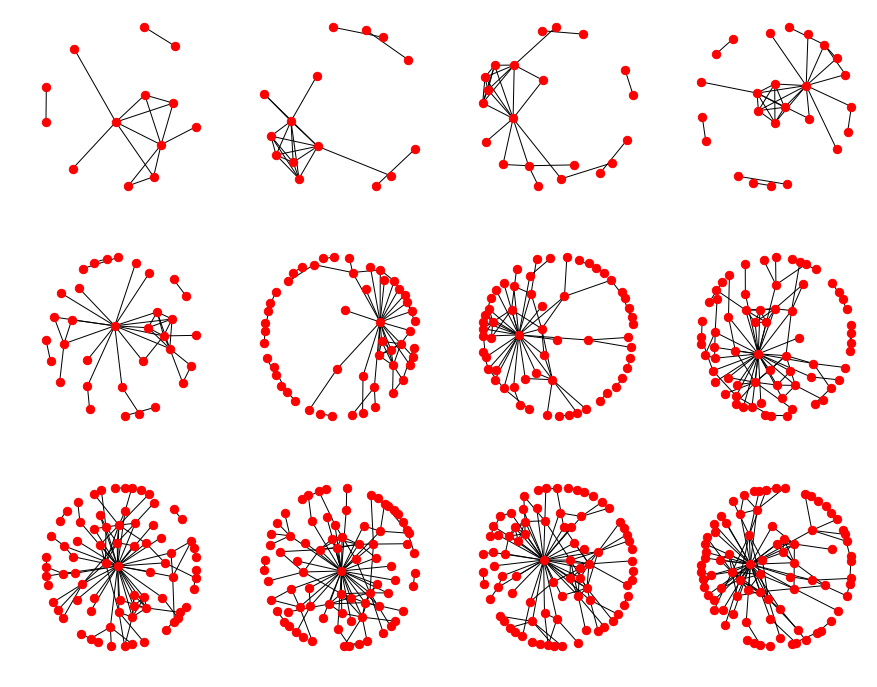

In [17]:
graph_dict = chronological_network('data/raw/hp_philosophers_stone.txt', 
                                   n_sections=12,
                                   cumulative=True)

fig = plt.figure()
for i in range(1, 13):
    fig.add_subplot(3, 4, i)
    nx.draw(graph_dict[i-1], node_size=70)

more to read and develop [here](https://en.wikipedia.org/wiki/Time-varying_network) and [here](https://en.wikipedia.org/wiki/Complex_network)



In the next notebook we'll come back to the idea of the cliques and communities that exist within social networks, and how they can be enumerated.  
[< 03 - Visualising and Analysing Networks](03%20-%20Visualising%20and%20Analysing%20Networks.ipynb) | [Home](https://github.com/harrisonpim/bookworm) | [05 - Cliques and Communities >](05%20-%20Cliques%20and%20Communities.ipynb)  

